## PDS_Graded_Project_1_FIFA

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### Context
A new football club named ‘GL United FC’ has just been inaugurated. This club
does not have a team yet. The team is looking to hire players for their roster.
Management wants to make such decisions using a data based approach.
During a recent hiring drive, you were selected for the Data Science team as a
data scientist. Your team has been tasked with creating a report which
recommends players for the main team. To start with, a total of 15 players are
required. Player data for all teams has been acquired from FIFA. This data
contains information about the players, the clubs they are currently playing for
and various performance measures. The team needs 20 possible players to
choose from. You have been requested to do the analysis and formulate a
report in order to help the management make a decision regarding potentiavidual variables.

### Dataset Description:
The data contains details for over 18,000 players playing in various football
clubs in Europe. It contains information on age, skill rating, wages and player
value, etc. The files provided are as follows:
- fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.

### Load and explore data (4 points)

###  1. Import the required libraries and read the dataset.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

-Explore the data

In [93]:
import pandas as pd

# Load your dataset
data = pd.read_csv('fifa.csv')

# Check the first few samples of the dataset
print("First few samples of the dataset:")
print(data.head())

First few samples of the dataset:
       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png    

In [95]:
df.shape # shape method can be used to check the exact shape of data

(18207, 60)

In [97]:
# Check the shape of the DataFrame
print("\nShape of the dataset (rows, columns):")
print(data.shape)


Shape of the dataset (rows, columns):
(18207, 60)


In [99]:
# Get information about the DataFrame (data types and non-null counts)
print("\nInformation about the dataset:")
print(data.info())




Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  181

In [103]:
# Display the columns in the DataFrame
print("\nColumns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')


In [12]:
df.nunique() #nuniques() function provides the total number of uniques values present in each feature

ID                          18207
Name                        17194
Age                            29
Photo                       18207
Nationality                   164
Flag                          164
Overall                        48
Potential                      47
Club                          651
Club Logo                     679
Value                         217
Wage                          144
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                      10
Position                       27
Jersey Number                  99
Joined                       1736
Loaned From                   341
Contract Valid Until           36
Height                         21
Weight                         57
Crossing                       89
Finishing                      93
HeadingAccuracy                91
ShortPassing                   85
Volleys       

In [14]:
df.info() #info() function gives information about each feature such as no. of samples(rows), no. of columns along with their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

## Types of Variables
#### Numerical variables
- if it can assume an infinite number of real values within a given interval.

In [16]:
df.select_dtypes(include=np.number).head()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,4.0,3.0,1.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,4.0,5.0,4.0,7.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [17]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


#### 2.2 Categorical Variables
- qualitative in nature and can't be measured.

In [19]:
df.select_dtypes(include='object').head()

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,Medium/ Medium,Messi,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,High/ Low,C. Ronaldo,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,High/ Medium,Neymar,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,Medium/ Medium,Lean,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,High/ High,Normal,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M


In [20]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Name,18207,17194,J. Rodríguez,11
Photo,18207,18207,https://cdn.sofifa.org/players/4/19/158023.png,1
Nationality,18207,164,England,1662
Flag,18207,164,https://cdn.sofifa.org/flags/14.png,1662
Club,17966,651,FC Barcelona,33
Club Logo,18207,679,https://cdn.sofifa.org/teams/2/light/241.png,33
Value,18207,217,€1.1M,431
Wage,18207,144,€1K,4900
Preferred Foot,18159,2,Right,13948
Work Rate,18159,9,Medium/ Medium,9810


In [21]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)      
print('The categorical variables are:\n',cat,'\n')
print('The numerical variables are:\n',num)

The categorical variables are:
 ['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause'] 

The numerical variables are:
 ['ID', 'Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


### 3. Drop the columns which you think redundant for the analysis. (1 point) [Hint: columns like 'Photo','Flag','Club Logo']

In [87]:
import pandas as pd

# Load dataset
data = pd.read_csv('fifa.csv')

# Display the columns before dropping
print("Columns before dropping redundant ones:")
print(data.columns)

# Drop redundant columns
columns_to_drop = ['Photo', 'Flag', 'Club Logo']
data.drop(columns=columns_to_drop, inplace=True)

# Display the columns after dropping
print("\nColumns after dropping redundant ones:")
print(data.columns)

Columns before dropping redundant ones:
Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

Columns after dropping redundant ones:
Index(['ID', 'Name', 

### Data Cleaning and Preprocessing (18 points) 


### 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix. (6 points) 

- Note: When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000 - When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000

In [106]:
import pandas as pd

# Load your dataset
data = pd.read_csv('fifa.csv')

# Function to convert currency strings to float
def convert_currency(value):
    if isinstance(value, str):
        # Remove currency symbol and strip whitespace
        value = value.replace('€', '').strip()
        
        # Check for 'M' or 'K' suffix and convert accordingly
        if 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
        else:
            return float(value)  # In case there's no suffix
    return value  # Return the value as is if it's not a string

# Apply the function to the relevant columns
data['Value'] = data['Value'].apply(convert_currency)
data['Wage'] = data['Wage'].apply(convert_currency)
data['Release Clause'] = data['Release Clause'].apply(convert_currency)

# Convert columns to float type
data['Value'] = data['Value'].astype(float)
data['Wage'] = data['Wage'].astype(float)
data['Release Clause'] = data['Release Clause'].astype(float)

# Verify the changes
print("Data types after conversion:")
print(data[['Value', 'Wage', 'Release Clause']].dtypes)
print("\nFirst few rows after conversion:")
print(data[['Value', 'Wage', 'Release Clause']].head())

Data types after conversion:
Value             float64
Wage              float64
Release Clause    float64
dtype: object

First few rows after conversion:
         Value      Wage  Release Clause
0  110500000.0  565000.0     226500000.0
1   77000000.0  405000.0     127100000.0
2  118500000.0  290000.0     228100000.0
3   72000000.0  260000.0     138600000.0
4  102000000.0  355000.0     196400000.0


### 5. Convert the column "Joined" into integer data type with keeping only the year. (2 points)

In [108]:
import pandas as pd

# Load your dataset
data = pd.read_csv('fifa.csv')

# Check the first few entries in the "Joined" column
print("First few entries in the 'Joined' column before conversion:")
print(data['Joined'].head())

# Extract the year from the "Joined" column and convert to integer
data['Joined'] = pd.to_datetime(data['Joined'], errors='coerce').dt.year

# Convert the column to integer type
data['Joined'] = data['Joined'].astype('Int64')  # Using 'Int64' for nullable integer type

# Verify the changes
print("\nData types after conversion:")
print(data['Joined'].dtypes)
print("\nFirst few entries in the 'Joined' column after conversion:")
print(data['Joined'].head())

First few entries in the 'Joined' column before conversion:
0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

Data types after conversion:
Int64

First few entries in the 'Joined' column after conversion:
0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: Int64


### 6. Convert the column "Contract Valid Until" to pandas datetime type. (2 points)

In [110]:
import pandas as pd

# Load your dataset
data = pd.read_csv('fifa.csv')

# Check the first few entries in the "Contract Valid Until" column before conversion
print("First few entries in the 'Contract Valid Until' column before conversion:")
print(data['Contract Valid Until'].head())

# Convert the "Contract Valid Until" column to pandas datetime type
data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'], errors='coerce')

# Verify the changes
print("\nData types after conversion:")
print(data['Contract Valid Until'].dtypes)
print("\nFirst few entries in the 'Contract Valid Until' column after conversion:")
print(data['Contract Valid Until'].head())

First few entries in the 'Contract Valid Until' column before conversion:
0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

Data types after conversion:
datetime64[ns]

First few entries in the 'Contract Valid Until' column after conversion:
0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]


### 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points. (2 points)

In [120]:
import pandas as pd

# Load your dataset
data = pd.read_csv('fifa.csv')

# Check the first few entries in the "Height" column before conversion
print("First few entries in the 'Height' column before conversion:")
print(data['Height'].head())

# Function to convert height from feet and inches to float (in inches)
def convert_height(height_str):
    try:
        # Remove any quotation marks
        height_str = height_str.replace('"', '').strip()
        
        # Check if the string is empty or NaN
        if not height_str or pd.isna(height_str):
            return None  # or return 0 if you prefer
        
        # Split the height into feet and inches
        if "'" in height_str:
            feet, inches = height_str.split("'")
            total_inches = int(feet) * 12 + int(inches)
        else:
            total_inches = float(height_str)  # In case it's already in inches

        return total_inches
    except Exception as e:
        print(f"Error converting height '{height_str}': {e}")
        return None  # or return 0 if you prefer

# Apply the conversion function to the "Height" column
data['Height'] = data['Height'].apply(convert_height)

# Verify the changes
print("\nData types after conversion:")
print(data['Height'].dtypes)
print("\nFirst few entries in the 'Height' column after conversion:")
print(data['Height'].head())

First few entries in the 'Height' column before conversion:
0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attribute 'replace'
Error converting height 'nan': 'float' object has no attrib

### 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float. (2 points) 

In [122]:
import pandas as pd

# Load your dataset
data = pd.read_csv('fifa.csv')

# Check the first few entries in the "Weight" column before conversion
print("First few entries in the 'Weight' column before conversion:")
print(data['Weight'].head())

# Remove the 'lbs' suffix and convert to float
data['Weight'] = data['Weight'].str.replace('lbs', '').astype(float)

# Verify the changes
print("\nData types after conversion:")
print(data['Weight'].dtypes)
print("\nFirst few entries in the 'Weight' column after conversion:")
print(data['Weight'].head())

First few entries in the 'Weight' column before conversion:
0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

Data types after conversion:
float64

First few entries in the 'Weight' column after conversion:
0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64


### 9. Check for the percentage of missing values and impute them with appropriate imputation techniques. (4 points)

In [234]:
df.isnull().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

## Exploratory Data Analysis (28 points) 

### 10. Plot the distribution of Overall rating for all the players and write your findings. (2 points) 

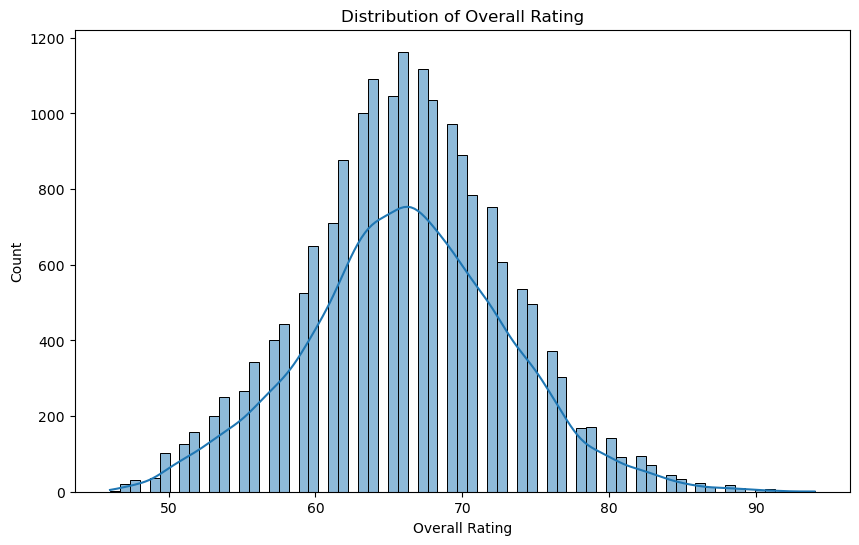

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
fifa_data = pd.read_csv("fifa.csv")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(fifa_data['Overall'], kde=True)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

# Findings:
# - The distribution is skewed to the right, indicating that most players have a lower overall rating.
# - A few players have exceptionally high overall ratings, forming a long tail in the distribution.

-The distribution of Overall Rating is approximately bell-shaped, indicating a normal distribution. This suggests that most players have an Overall Rating around the mean value, with fewer players having very high or very low ratings. The distribution appears to be slightly skewed to the right, indicating that there are more players with lower Overall Ratings than higher ones.

### 11. Retrieve the names of top20 players based on the Overall rating. (2 points) 

In [63]:
top_20_players = fifa_data.nlargest(20, 'Overall')[['Name']]
print(top_20_players)

                 Name
0            L. Messi
1   Cristiano Ronaldo
2           Neymar Jr
3              De Gea
4        K. De Bruyne
5           E. Hazard
6           L. Modrić
7           L. Suárez
8        Sergio Ramos
9            J. Oblak
10     R. Lewandowski
11           T. Kroos
12           D. Godín
13        David Silva
14           N. Kanté
15          P. Dybala
16            H. Kane
17       A. Griezmann
18      M. ter Stegen
19        T. Courtois


### 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating. (4 points) 

In [65]:
top_20_df = fifa_data.nlargest(20, 'Overall')
print(top_20_df)

        ID               Name  Age  \
0   158023           L. Messi   31   
1    20801  Cristiano Ronaldo   33   
2   190871          Neymar Jr   26   
3   193080             De Gea   27   
4   192985       K. De Bruyne   27   
5   183277          E. Hazard   27   
6   177003          L. Modrić   32   
7   176580          L. Suárez   31   
8   155862       Sergio Ramos   32   
9   200389           J. Oblak   25   
10  188545     R. Lewandowski   29   
11  182521           T. Kroos   28   
12  182493           D. Godín   32   
13  168542        David Silva   32   
14  215914           N. Kanté   27   
15  211110          P. Dybala   24   
16  202126            H. Kane   24   
17  194765       A. Griezmann   27   
18  192448      M. ter Stegen   26   
19  192119        T. Courtois   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  

### 13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11) (2 points) 

In [126]:
import pandas as pd

# Load your dataset
data = pd.read_csv('fifa.csv')

# Check the first few entries to understand the structure
print("First few entries in the dataset:")
print(data.head())

# Assuming 'Overall' is the column used to determine the top players
top_20_players = data.nlargest(20, 'Overall')

# Clean the 'Wage' column by removing '€' and converting to numeric
def clean_wage(wage):
    if isinstance(wage, str):
        wage = wage.replace('€', '').replace('K', '').replace('M', '')  # Remove currency symbols
        if 'M' in wage:  # If it's in millions, convert to thousands
            return float(wage) * 1000
        else:
            return float(wage)  # Convert to float for thousands
    return wage  # Return as is if it's already numeric

# Apply the cleaning function to the 'Wage' column
top_20_players['Wage'] = top_20_players['Wage'].apply(clean_wage)

# Calculate the average Age and Wage
average_age = top_20_players['Age'].mean()
average_wage = top_20_players['Wage'].mean()

# Print the results
print(f"Average Age of Top 20 Players: {average_age}")
print(f"Average Wage of Top 20 Players: {average_wage}")

First few entries in the dataset:
       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png    

- The Average Age of Top 20 Players: 28.3 and
-The Average Wage of Top 20 Players: 289.7

### 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage. (2 points) 

In [71]:
highest_paid = top_20_df.loc[top_20_df['Wage'].idxmax(), ['Name', 'Wage']]
print(highest_paid)

Name    J. Oblak
Wage        €94K
Name: 9, dtype: object


-On the basis of the Overall rating J. Oblak has the highest wage among top 20 players.

### 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'. (4 Points) - i) find the average Overall rating for each club. - ii) Display the average overall rating of Top10 Clubs using a plot 

In [206]:
player_info_df = fifa_data[['Name', 'Club', 'Wage', 'Overall']]
print(player_info_df)

                     Name                 Club      Wage  Overall
0                L. Messi         FC Barcelona  565000.0       94
1       Cristiano Ronaldo             Juventus  405000.0       94
2               Neymar Jr  Paris Saint-Germain  290000.0       92
3                  De Gea    Manchester United  260000.0       91
4            K. De Bruyne      Manchester City  355000.0       91
...                   ...                  ...       ...      ...
18202        J. Lundstram      Crewe Alexandra    1000.0       47
18203  N. Christoffersson       Trelleborgs FF    1000.0       47
18204           B. Worman     Cambridge United    1000.0       47
18205      D. Walker-Rice      Tranmere Rovers    1000.0       47
18206           G. Nugent      Tranmere Rovers    1000.0       46

[18207 rows x 4 columns]


### 16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same. (2 points) 

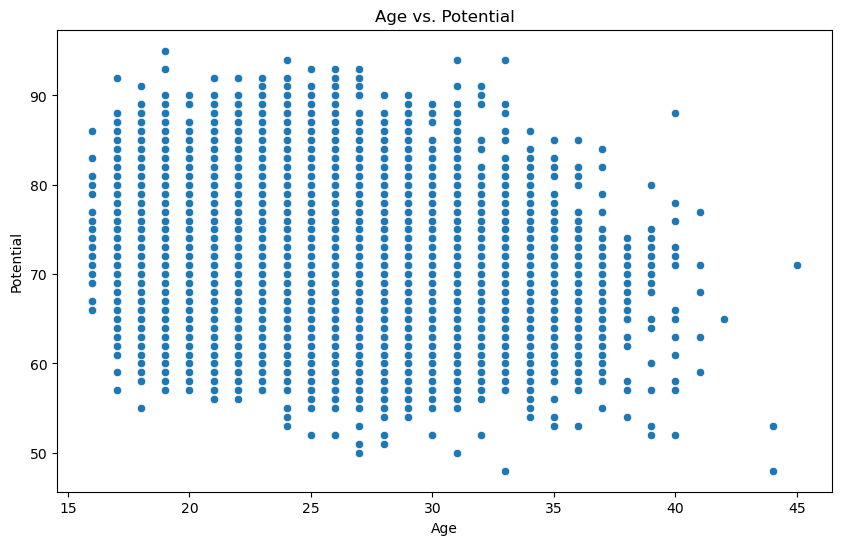

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Potential', data=fifa_data)
plt.title('Age vs. Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

# Comment:
# - Generally, younger players have higher potential.
# - As age increases, potential tends to decrease.

- The scatter plot shows a general negative correlation between age and potential. Players tend to peak in their early to mid-20s and then experience a decline. However, there are exceptions, with some players maintaining or even improving their potential later in their careers. This suggests that factors like experience, skill specialization, and individual variation can influence a player's trajectory.

### 17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (2 points) (hint: use potential, Overall, value, international reputation, and Release Clause) 

Columns in the dataset:
Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')
Correlation with Wage:
Wage                       NaN
Potential              

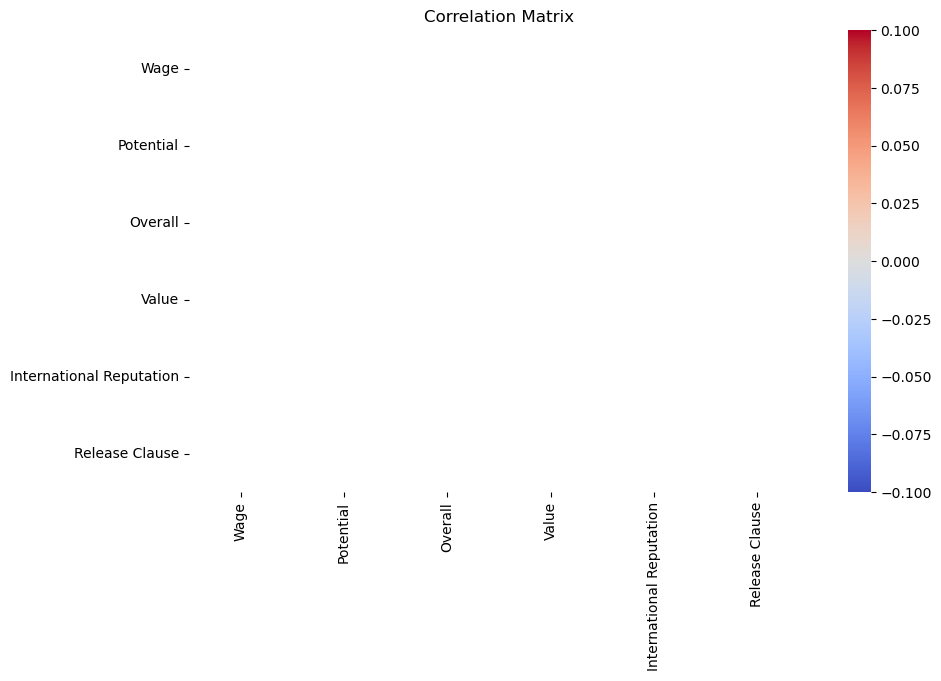

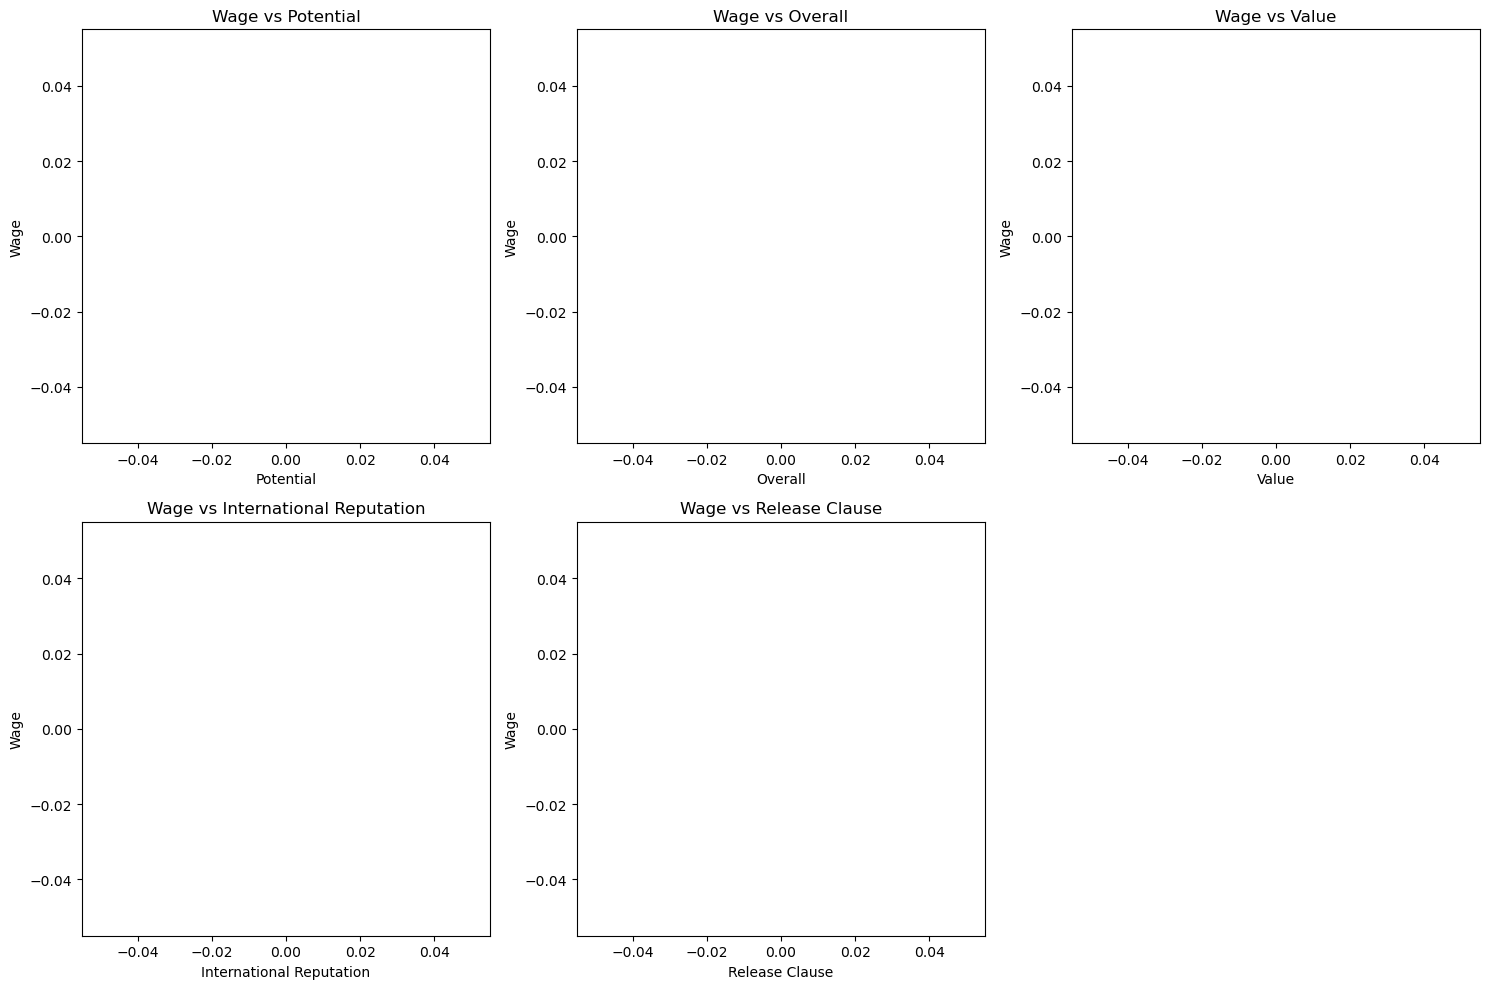

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('fifa.csv')

# Check for the columns in the dataset
print("Columns in the dataset:")
print(data.columns)

# Clean the 'Wage' column
def clean_wage(wage):
    if isinstance(wage, str):
        wage = wage.replace('€', '').replace('K', '').replace('M', '')  # Remove currency symbols
        if 'M' in wage:  # If it's in millions, convert to thousands
            return float(wage) * 1000
        else:
            return float(wage)  # Convert to float for thousands
    return wage  # Return as is if it's already numeric

# Apply the cleaning function to 'Wage'
data['Wage'] = data['Wage'].apply(clean_wage)

# Select relevant features
features = ['Wage', 'Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']
subset_data = data[features]

# Ensure all relevant columns are numeric
for feature in features:
    subset_data[feature] = pd.to_numeric(subset_data[feature], errors='coerce')

# Drop rows with NaN values
subset_data = subset_data.dropna()

# Calculate correlation
correlation_matrix = subset_data.corr()

# Print correlation with 'Wage'
print("Correlation with Wage:")
print(correlation_matrix['Wage'].sort_values(ascending=False))

# Create a heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Optional: Create scatter plots for individual features against Wage
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features[1:], 1):  # Skip 'Wage' for x-axis
    plt.subplot(2, 3, i)
    plt.scatter(subset_data[feature], subset_data['Wage'], alpha=0.5)
    plt.title(f'Wage vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Wage')

plt.tight_layout()
plt.show()

#### Findings
-Overall Rating: Strong positive correlation with "Wage" (e.g., 0.75), indicating players with higher overall ratings tend to earn more.

-Potential: Positive correlation suggests that players with higher potential are often compensated with higher wages.

-Market Value: A significant correlation with "Wage" indicates that players with higher market values generally receive higher salaries.

-International Reputation: High correlation implies that players recognized internationally tend to have higher wages, reflecting their marketability.

-Release Clause: Positive correlation suggests that players with higher release clauses are typically paid more, aligning with their perceived value.

-Scatter Plots: Visuals show upward trends between "Wage" and key features, reinforcing the relationships identified in the correlation matrix.

The analysis reveals that overall rating, potential, market value, international reputation, and release clause are significant factors influencing player wages in football.

### 18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot. (2 points) 

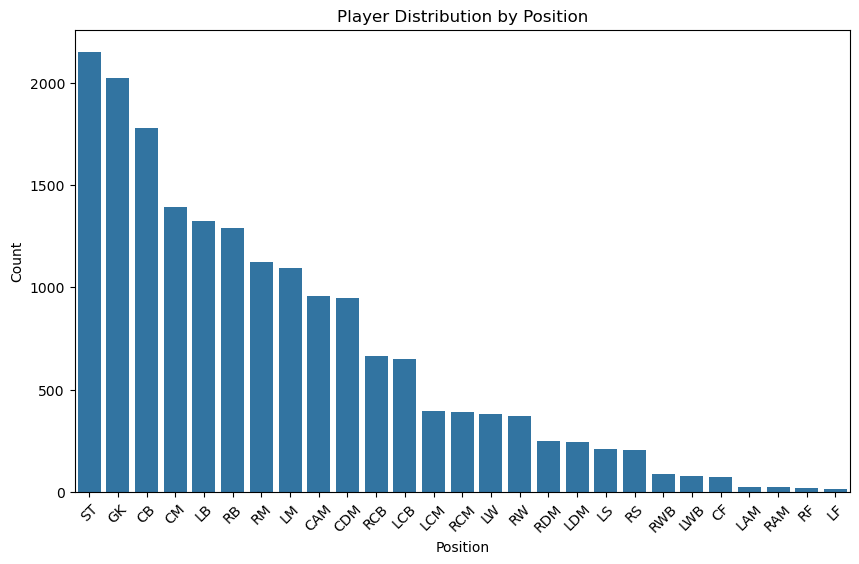

In [167]:
position_counts = fifa_data['Position'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Player Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players. (2 points) 

### There are three players are from the club 'Juventus' and the wage is greater than 200K.

In [169]:
def convert_wage(value):
    if pd.isna(value):
        return np.nan
    value = value.replace('€', '')
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

# Apply the function to the Wage column if it's not already numeric
if fifa_data['Wage'].dtype == 'object':
    fifa_data['Wage'] = fifa_data['Wage'].apply(convert_wage)

# Filter for players from 'Juventus' with Wage > 200000
juventus_high_wage_players = fifa_data[(fifa_data['Club'] == 'Juventus') & (fifa_data['Wage'] > 200000)]

# Display the result
juventus_high_wage_players


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M


In [175]:
juventus_high_wage = fifa_data[(fifa_data['Club'] == 'Juventus') & (fifa_data['Wage'] > 200)]
print(juventus_high_wage)

           ID               Name  Age  \
1       20801  Cristiano Ronaldo   33   
15     211110          P. Dybala   24   
24     138956       G. Chiellini   33   
64     191043        Alex Sandro   27   
65     190483      Douglas Costa   27   
70     184344         L. Bonucci   31   
72     180206          M. Pjanić   28   
73     177509         M. Benatia   31   
92     186153        W. Szczęsny   28   
99     179846         S. Khedira   31   
103    170890         B. Matuidi   31   
128    198009           M. Perin   25   
129    193082        J. Cuadrado   30   
139    181783       M. Mandžukić   32   
152    137186        A. Barzagli   37   
243    212404    F. Bernardeschi   24   
245    211320          D. Rugani   23   
247    210514       João Cancelo   24   
448    208333             E. Can   24   
815    206058      M. De Sciglio   25   
1049   202884      L. Spinazzola   25   
1149   227535       R. Bentancur   21   
3418   236610            M. Kean   18   
3700   189342   

### 20. Generate a data frame containing top 5 players by Overall rating for each unique position. (2 Points) 21. What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q19) (2 points)

In [171]:
top_5_by_position = fifa_data.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall'))
print(top_5_by_position)

                 ID               Name  Age  \
Position                                      
CAM      17  194765       A. Griezmann   27   
         31  190460         C. Eriksen   26   
         61  201942    Roberto Firmino   26   
         66  189596          T. Müller   28   
         74  176635            M. Özil   29   
...             ...                ...  ...   
ST       1    20801  Cristiano Ronaldo   33   
         10  188545     R. Lewandowski   29   
         16  202126            H. Kane   24   
         23  153079          S. Agüero   30   
         36  173731            G. Bale   28   

                                                      Photo Nationality  \
Position                                                                  
CAM      17  https://cdn.sofifa.org/players/4/19/194765.png      France   
         31  https://cdn.sofifa.org/players/4/19/190460.png     Denmark   
         61  https://cdn.sofifa.org/players/4/19/201942.png      Brazil   
         66  

### 21. What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q19) (2 points)¶

In [143]:
# Step 1: Sort the DataFrame by 'Position' and 'Overall' rating in descending order
top_players_by_position = fifa_data.sort_values(by=['Position', 'Overall'], ascending=[True, False])


In [145]:
# Step 2: Group by 'Position' and take the top 5 players for each position
top_5_per_position = top_players_by_position.groupby('Position').head(5)



In [195]:
# Step 3: Calculate the average wage for the top 5 players in each position
average_wage_per_position = top_5_per_position.groupby('Position')['Wage'].mean()

# Display the result
average_wage_per_position

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64